# Brooklyn99 Project

## Load Data

In [0]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files

In [0]:
upload_file = files.upload()

Saving Brooklyn.csv to Brooklyn.csv


In [0]:
brooklyn = pd.read_csv('Brooklyn.csv')

In [0]:
brooklyn = brooklyn.iloc[:,[2,0]]

In [0]:
brooklyn.head()

Transcript                  Chapter
0  \n\n\n\n\n\nThis job is eating me alive.\nI ca...        \n01x01 - Pilot\n
1  \n\n\n\n\n\nAh, Captain. You're at my desk.\nJ...   \n01x02 - The Tagger\n
2  \n\n\n\n\n\nFor the last time, the best cop mo...    \n01x03 - The Slump\n
3  \n\n\n\n\n\nI'm so glad we could finally do th...    \n01x04 - M.E. Time\n
4  \n\n\n\n\n\nHey, you guys see the dude I broug...  \n01x05 - The Vulture\n

## Clean Data

In [0]:
import re

In [0]:
brooklyn['Chapter'] = brooklyn['Chapter'].apply(lambda x: x.replace('\n', ''))

In [0]:
brooklyn['Transcript'] = brooklyn['Transcript'].apply(lambda x: x.replace('\n', ''))

In [0]:
brooklyn.head()

Transcript              Chapter
0  This job is eating me alive.I can't breathe an...        01x01 - Pilot
1  Ah, Captain. You're at my desk.Just what I wan...   01x02 - The Tagger
2  For the last time, the best cop movies, in ord...    01x03 - The Slump
3  I'm so glad we could finally do this.I know, K...    01x04 - M.E. Time
4  Hey, you guys see the dude I brought in today....  01x05 - The Vulture

In [0]:
' '.join(brooklyn['Transcript'].tolist())

'This job is eating me alive.I can\'t breathe anymore.I spent all these years trying to be the good guy, the man in the white hat.I\'m not becoming like them.I am them.Hey! What are you doing, weirdo?I\'m doing the best speech from Donnie Brasco.Or actually, ten of me are doing the best speech from Donnie Brasco.What\'s up?Get it together, man. Okay?So the store was hit about two hours ago.They took mostly tablets, laptops, and cameras.[Keyboard playing \'80s hip-hop beat][Music stops]Sorry.I\'d like a list of all your employees, whoever had access to the store.I\'d also like to apologize for my partner.His parents didn\'t give him enough attention.Uh, Detective...I already solved the case.We\'re looking for three white males, one of whom has sleeve tats on both arms.And how do you know that?I had an informant on the inside.He\'s been here for years.Watching, learning. Waiting.His code name?Fuzzy Cuddle bear.He\'s a nanny cam.[Scoffs] You got lucky.No, I got here five minutes before yo

In [0]:
contractions = {
      "'aight": "alright",
      "ain't": "am not",
      "amn't": "am not",
      "aren't": "are not",
      "can't": "cannot",
      "'cause": "because",
      "could've": "could have",
      "couldn't": "could not",
      "couldn't've": "could not have",
      "daren't": "dare not",
      "daresn't": "dare not",
      "dasn't": "dare not",
      "didn't": "did not",
      "doesn't": "does not",
      "don't": "do not",
      "d'ye": "do you",
      "e'er": "ever",
      "everybody's": "everybody is",
      "everyone's": "everyone is",
      "finna": "fixing to",
      "g'day": "good day",
      "gimme": "give me",
      "giv'n": "given",
      "gonna": "going to",
      "gon't": "go not",
      "gotta": "got to",
      "hadn't": "had not",
      "had've": "had have",
      "hasn't": "has not",
      "haven't": "have not",
      "he'd": "he had",
      "he'dn't've'd": "he would not have had",
      "he'll": "he shall",
      "he's": "he has ",
      "he've": "he have",
      "how'd": "how did ",
      "howdy": "how do you do ",
      "how'll": "how will",
      "how're": "how are",
      "how's": "how has ",
      "i'd": "i had ",
      "i'd've": "i would have",
      "i'll": "i shall ",
      "i'm": "i am",
      "i'm'a": "i am about to",
      "i'm'o": "i am going to",
      "innit": "is it not",
      "i've": "i have",
      "isn't": "is not",
      "it'd": "it would",
      "it'll": "it shall ",
      "it's": "it has ",
      "let's": "let us",
      "ma'am": "madam",
      "mayn't": "may not",
      "may've": "may have",
      "methinks": "me thinks",
      "mightn't": "might not",
      "might've": "might have",
      "mustn't": "must not",
      "mustn't've": "must not have",
      "must've": "must have",
      "needn't": "need not",
      "ne'er": "never",
      "o'clock": "of the clock",
      "o'er": "over",
      "ol'": "old",
      "oughtn't": "ought not",
      "shalln't": "shall not",
      "shan't": "shall not",
      "she'd": "she had ",
      "she'll": "she shall ",
      "she's": "she has ",
      "should've": "should have",
      "shouldn't": "should not",
      "shouldn't've": "should not have",
      "somebody's": "somebody has ",
      "someone's": "someone has ",
      "something's": "something has ",
      "so're": "so are",
      "that'll": "that shall ",
      "that're": "that are",
      "that's": "that has ",
      "that'd": "that would ",
      "there'd": "there had ",
      "there'll": "there shall ",
      "there're": "there are",
      "there's": "there has ",
      "these're": "these are",
      "these've": "these have",
      "they'd": "they had ",
      "they'll": "they shall ",
      "they're": "they are ",
      "they've": "they have",
      "this's": "this has ",
      "those're": "those are",
      "those've": "those have",
      "'tis": "it is",
      "to've": "to have",
      "'twas": "it was",
      "wanna": "want to",
      "wasn't": "was not",
      "we'd": "we had ",
      "we'd've": "we would have",
      "we'll": "we shall ",
      "we're": "we are",
      "we've": "we have",
      "weren't": "were not",
      "what'd": "what did",
      "what'll": "what shall ",
      "what're": "what are",
      "what's": "what has ",
      "what've": "what have",
      "when's": "when has ",
      "where'd": "where did",
      "where'll": "where shall ",
      "where're": "where are",
      "where's": "where has ",
      "where've": "where have",
      "which'd": "which had ",
      "which'll": "which shall ",
      "which're": "which are",
      "which's": "which has ",
      "which've": "which have",
      "who'd": "who would ",
      "who'd've": "who would have",
      "who'll": "who shall ",
      "who're": "who are",
      "who's": "who has ",
      "who've": "who have",
      "why'd": "why did",
      "why're": "why are",
      "why's": "why has ",
      "willn't": "will not",
      "won't": "will not",
      "wonnot": "will not",
      "would've": "would have",
      "wouldn't": "would not",
      "wouldn't've": "would not have",
      "y'all": "you all",
      "y'all'd've": "you all would have",
      "y'all'dn't've'd": "you all would not have had",
      "y'all're": "you all are",
      "you'd": "you had ",
      "you'll": "you shall ",
      "you're": "you are",
      "you've": "you have"
}

In [0]:
# function to expand contractions
def cont_to_exp(x):
  if type(x) is str:
    x = x.lower()
    x = x.replace('\\', '')
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  
  else:
    return x

In [0]:
brooklyn['Transcript'] = brooklyn['Transcript'].apply(lambda x: cont_to_exp(x))

In [0]:
# keep only relevant characters 
brooklyn['Transcript'] = brooklyn['Transcript'].apply(lambda x: re.sub("[^a-zA-Z\s\:\*\']", " ", x))

In [0]:
brooklyn.head()

Transcript              Chapter
0  this job is eating me alive i cannot breathe a...        01x01 - Pilot
1  ah  captain  you are at my desk just what i wa...   01x02 - The Tagger
2  for the last time  the best cop movies  in ord...    01x03 - The Slump
3  i am so glad we could finally do this i know  ...    01x04 - M.E. Time
4  hey  you guys see the dude i brought in today ...  01x05 - The Vulture

In [0]:
# delete multiple spaces
brooklyn['Transcript'] = brooklyn['Transcript'].apply(lambda x: re.sub("[\s]+", " ", x))

In [0]:
' '.join(brooklyn['Transcript'].tolist())

"this job is eating me alive i cannot breathe anymore i spent all these years trying to be the good guy the man in the white hat i am not becoming like them i am them hey what are you doing weirdo i am doing the best speech from donnie brasco or actually ten of me are doing the best speech from donnie brasco what has up get it together man okay so the store was hit about two hours ago they took mostly tablets laptops and cameras keyboard playing ' s hip hop beat music stops sorry i had like a list of all your employees whoever had access to the store i had also like to apologize for my partner his parents did not give him enough attention uh detective i already solved the case we are looking for three white males one of whom has sleeve tats on both arms and how do you know that i had an informant on the inside he has been here for years watching learning waiting his code name fuzzy cuddle bear he has a nanny cam scoffs you got lucky no i got here five minutes before you and figured tha

## Add Season and Episode Number Columns

In [0]:
brooklyn[['Index', 'Name']] = brooklyn.Chapter.apply(lambda x: pd.Series(str(x).split("-",1)))

In [0]:
brooklyn.head()

Transcript  ...          Name
0  this job is eating me alive i cannot breathe a...  ...         Pilot
1  ah captain you are at my desk just what i want...  ...    The Tagger
2  for the last time the best cop movies in order...  ...     The Slump
3  i am so glad we could finally do this i know k...  ...     M.E. Time
4  hey you guys see the dude i brought in today t...  ...   The Vulture

[5 rows x 4 columns]

In [0]:
brooklyn[['Season', 'Episode']] = brooklyn.Index.apply(lambda x: pd.Series(str(x).split("x",1)))

In [0]:
# reorder columns
brooklyn_by_season = brooklyn.iloc[:, [4,5,0]]

In [0]:
brooklyn_by_season.head()

Season Episode                                         Transcript
0     01     01   this job is eating me alive i cannot breathe a...
1     01     02   ah captain you are at my desk just what i want...
2     01     03   for the last time the best cop movies in order...
3     01     04   i am so glad we could finally do this i know k...
4     01     05   hey you guys see the dude i brought in today t...

In [0]:
# episodes in season
brooklyn_by_season.groupby(['Season']).size().reset_index(name='counts')

Season  counts
0                    01      22
1                    02      23
2                    03      23
3                    04      11
4                    06      11
5                    07       9
6  Board Updates: COVID       3
7          Online Store       3

In [0]:
# keep only rows of seasons
brooklyn_by_season = brooklyn_by_season.loc[~brooklyn_by_season['Season'].isin(['Board Updates: COVID', 'Online Store'])]

In [0]:
# episodes in season
brooklyn_by_season.groupby(['Season']).size().reset_index(name='counts')

Season  counts
0     01      22
1     02      23
2     03      23
3     04      11
4     06      11
5     07       9

In [0]:
brooklyn_by_season.head()

Season Episode                                         Transcript
0     01     01   this job is eating me alive i cannot breathe a...
1     01     02   ah captain you are at my desk just what i want...
2     01     03   for the last time the best cop movies in order...
3     01     04   i am so glad we could finally do this i know k...
4     01     05   hey you guys see the dude i brought in today t...

## Popular Unigrams, Bigrams and Triagrams

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
def my_tokenizer(text):
    # split based on whitespace
    return re.split("\\s+",text)

In [0]:
def get_top_n_words(x , n, t_min, t_max, stop):
  if stop:
    vec = CountVectorizer(ngram_range=(t_min,t_max), stop_words='english', tokenizer=my_tokenizer).fit(x)
  else:
    vec = CountVectorizer(ngram_range=(t_min,t_max), tokenizer=my_tokenizer).fit(x)

  bow = vec.transform(x)
  sum_words = bow.sum(axis=0)
  words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

### Unigram

In [0]:
words = get_top_n_words(brooklyn_by_season['Transcript'], 15, 1, 1, True)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
df1 = pd.DataFrame(words, columns = ['Word', 'Frequency'])

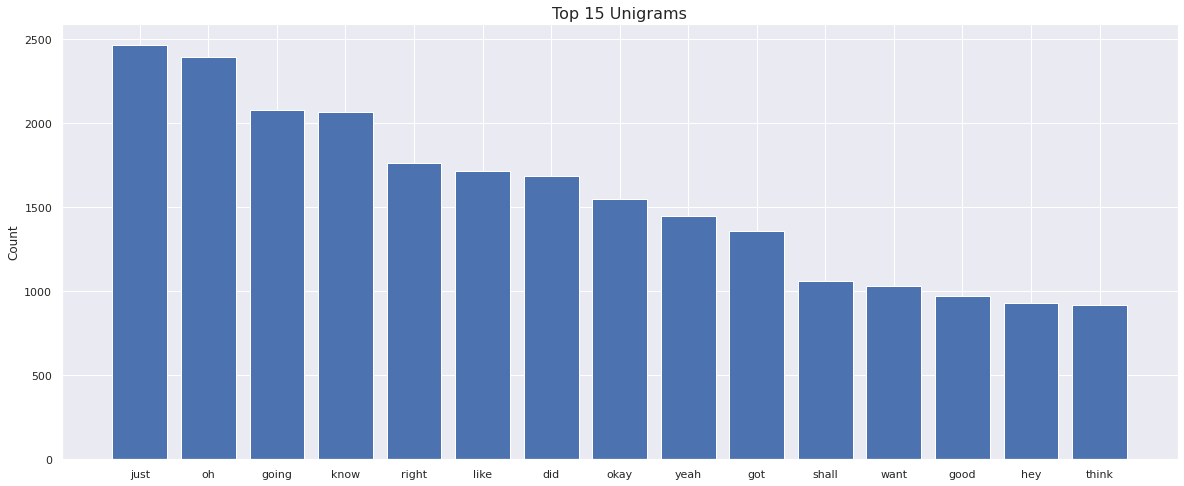

In [0]:
plt.figure(figsize=(20,8))
plt.ylabel('Count')
plt.title('Top 15 Unigrams', fontdict={'fontsize': 16})
plt.bar(df1['Word'], df1['Frequency'])
plt.show()

### Bigram

In [0]:
words = get_top_n_words(brooklyn_by_season['Transcript'], 15, 2 , 2, True)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
df1 = pd.DataFrame(words, columns = ['Word', 'Frequency'])

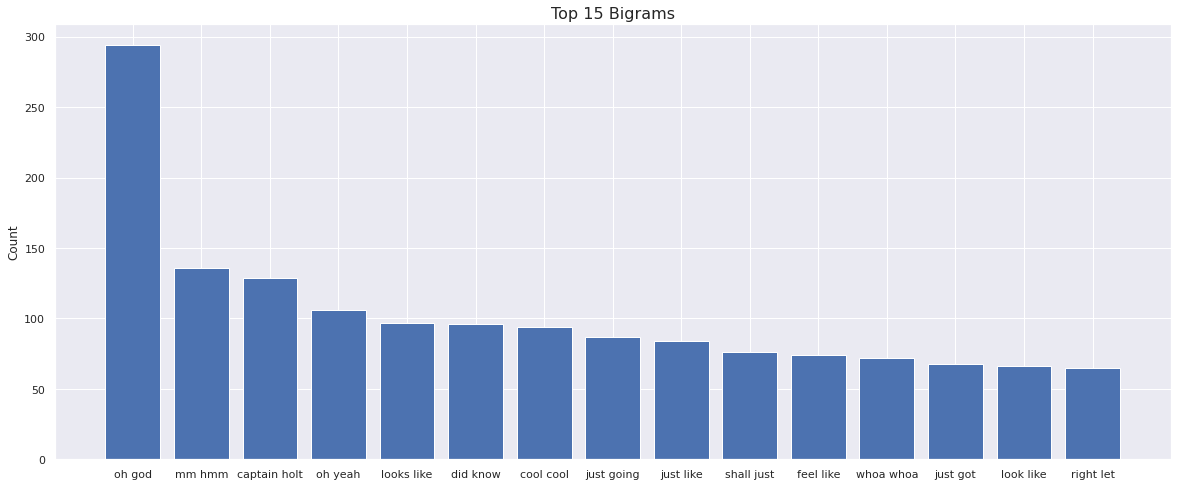

In [0]:
plt.figure(figsize=(20,8))
plt.ylabel('Count')
plt.title('Top 15 Bigrams', fontdict={'fontsize': 16})
plt.bar(df1['Word'], df1['Frequency'])
plt.show()

### Trigram

In [0]:
words = get_top_n_words(brooklyn_by_season['Transcript'], 15, 3 ,3, True)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
df1 = pd.DataFrame(words, columns = ['Word', 'Frequency'])

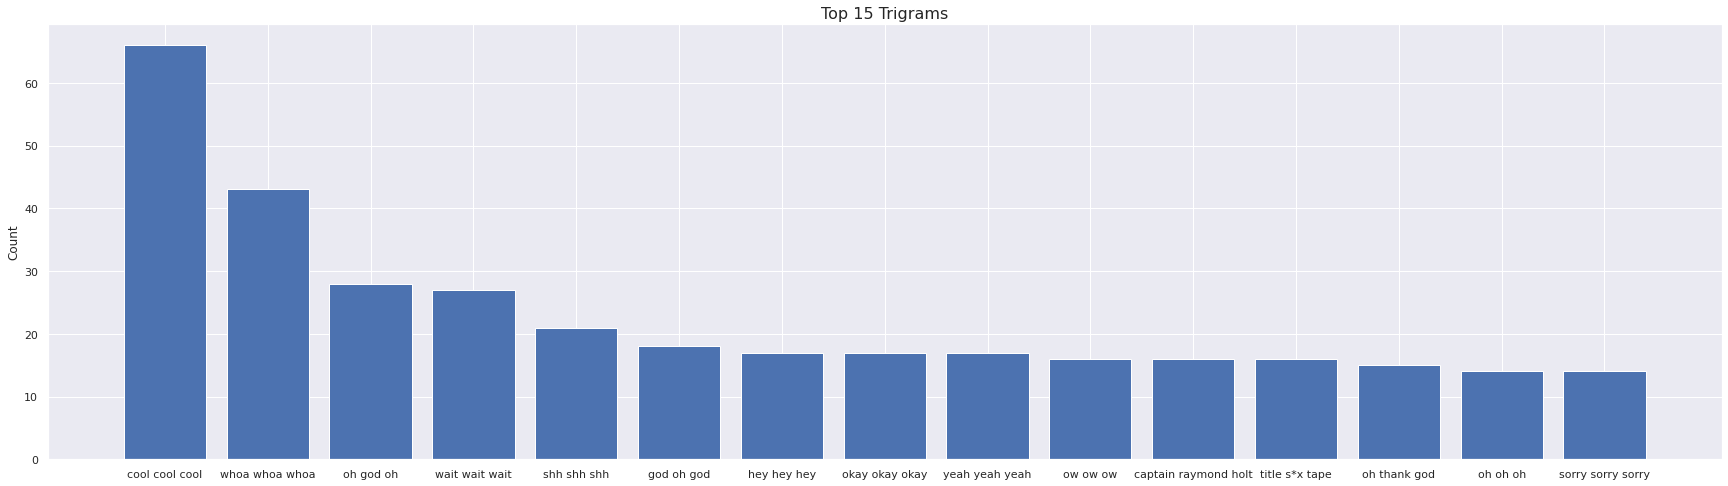

In [0]:
plt.figure(figsize=(30,8))
plt.ylabel('Count')
plt.title('Top 15 Trigrams', fontdict={'fontsize': 16})
plt.bar(df1['Word'], df1['Frequency'])
plt.show()

## Catchphrases by season 


1.   cool cool cool cool cool: because number of 'cool' is not consistent we will demand at least 3 cool's.
2.   title of your sex tape: because sometimes its title of/name of/ santiago's etc. we will look only for the phrase 'sex tape'.
3. noice and smort



In [0]:
seasons = brooklyn_by_season['Season'].unique()
seasons

array(['01', '02', '03', '04', '06', '07'], dtype=object)

In [0]:
df_catchphrases = pd.DataFrame(seasons, columns = ['Season'])

In [0]:
df_catchphrases

Season
0     01
1     02
2     03
3     04
4     06
5     07

In [0]:
df_catchphrases['Episodes'] = brooklyn_by_season.groupby(['Season']).size().reset_index(name='counts')['counts']

In [0]:
df_catchphrases['Transcript'] = df_catchphrases['Season'].apply(lambda x: ' '.join(brooklyn_by_season['Transcript'].loc[brooklyn_by_season['Season'] == x].tolist()))

In [0]:
df_catchphrases

Season  Episodes                                         Transcript
0     01        22  this job is eating me alive i cannot breathe a...
1     02        23   tango music glass clinking excuse me excuse m...
2     03        23  previously on brooklyn nine nine i am being tr...
3     04        11  are you ready for this one dotties' daughter a...
4     06        11  and now on to new business peralta there has a...
5     07         9  look we all know scully has the hardest head b...

In [0]:
def count_catchPhrase(pattern, x):
  count = 0
  p = re.compile(pattern)
  matches = p.finditer(x)
  for match in matches:
    count = count + 1
  
  return count

In [0]:
cool_pattern = r'(cool ){3,}[^cool]'
df_catchphrases['Cool Frequency'] = df_catchphrases['Transcript'].apply(lambda x: count_catchPhrase(cool_pattern, x))

In [0]:
df_catchphrases['Tape Frequency'] = df_catchphrases['Transcript'].apply(lambda x: count_catchPhrase("s*x tape", x))

In [0]:
df_catchphrases['Noice'] = df_catchphrases['Transcript'].apply(lambda x: count_catchPhrase("noice", x))

In [0]:
df_catchphrases['Smort'] = df_catchphrases['Transcript'].apply(lambda x: count_catchPhrase("smort", x))

In [0]:
df_catchphrases['Noice and Smort'] = df_catchphrases['Noice'] + df_catchphrases['Smort']

In [0]:
df_catchphrases

Season  Episodes  ... Smort  Noice and Smort
0     01        22  ...     0                0
1     02        23  ...     1                5
2     03        23  ...     3                9
3     04        11  ...     1                3
4     06        11  ...     0                1
5     07         9  ...     0                0

[6 rows x 9 columns]

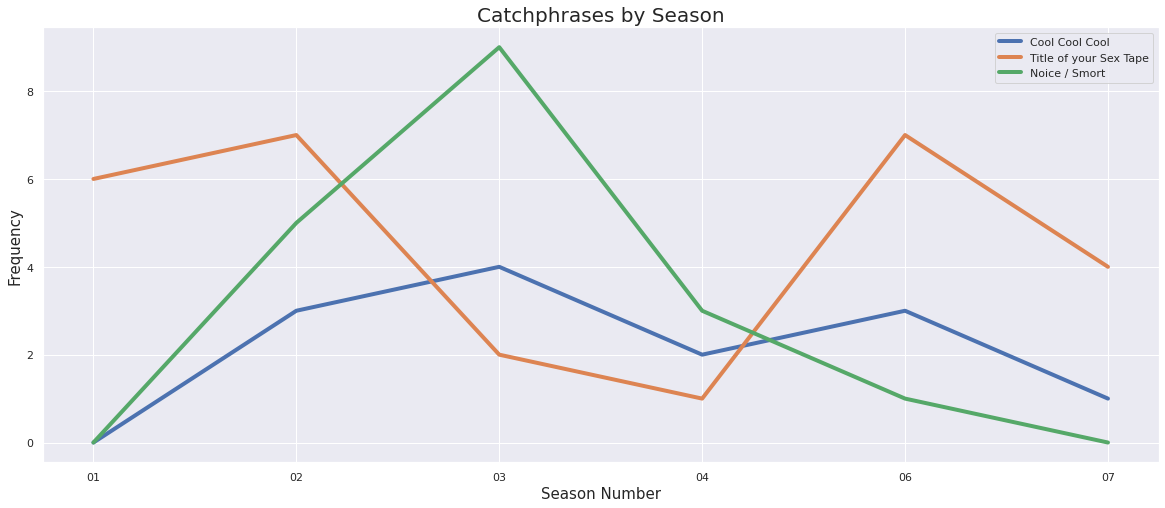

In [0]:
plt.figure(figsize=(20,8))
plt.title('Catchphrases by Season', fontdict={'fontsize': 20})
plt.xlabel('Season Number', fontdict={'fontsize': 15})
plt.ylabel('Frequency', fontdict={'fontsize': 15})
plt.plot(df_catchphrases['Season'], df_catchphrases['Cool Frequency'], lw = 4)
plt.plot(df_catchphrases['Season'], df_catchphrases['Tape Frequency'], lw = 4)
plt.plot(df_catchphrases['Season'], df_catchphrases['Noice and Smort'], lw = 4)
plt.legend(['Cool Cool Cool', 'Title of your Sex Tape', 'Noice / Smort'])
plt.show()